## Data Analysis

### Import Modules

In [80]:
#Data Cleaning
import pandas as pd
import numpy as np
from scipy.stats import linregress

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sn

# Data Extraction
import requests
import json

### Load Data from CSV

In [81]:
iso_cleaned_df = pd.read_csv('./Resources/isoDataFinal.csv')
vaccination_df = pd.read_csv('./Resources/iso_code.csv')

In [82]:
iso_cleaned_df.head(10)

,iso_code,Country,GDP,Total_Pop,Pop_Den,health_exp,Lat_avg,Lng_avg,total_vaccinations,people_fully_vaccinated_per_hundred
0,ALB,Albania,1.514702e+10,2866376.0,104.612263,44.657787,41.0000,20.0000,400064.0,0.02
1,AND,Andorra,3.218316e+09,77006.0,163.842553,32.065220,42.5000,1.6000,26414.0,6.06
2,ARE,United Arab Emirates,4.222150e+11,9630959.0,135.609110,48.421539,24.0000,54.0000,10336214.0,38.79
3,ARG,Argentina,5.176267e+11,44494502.0,16.258510,38.290127,-34.0000,-64.0000,7386650.0,1.95
4,AUT,Austria,4.550949e+11,8840521.0,107.131859,26.914829,47.3333,13.3333,2863389.0,8.73
5,AZE,Azerbaijan,4.711294e+10,9939771.0,120.257592,72.804810,40.5000,47.5000,1440243.0,4.87
6,BEL,Belgium,5.437344e+11,11427054.0,377.379590,24.215460,50.8333,4.0000,3563371.0,6.60
7,BGD,Bangladesh,2.740391e+11,161356039.0,1239.579312,76.501839,24.0000,90.0000,7954176.0,1.31
8,BGR,Bulgaria,6.623016e+10,7025037.0,64.711100,42.363476,43.0000,25.0000,750899.0,2.56
9,BHR,Bahrain,3.765250e+10,1569439.0,2012.101282,41.167648,26.0000,50.5500,1206763.0,31.14


### Split Data by Indicator quartiles

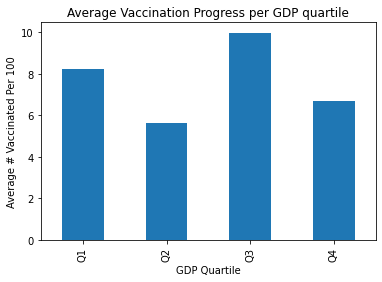

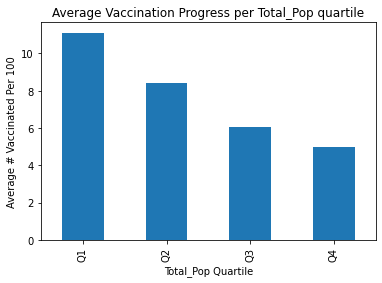

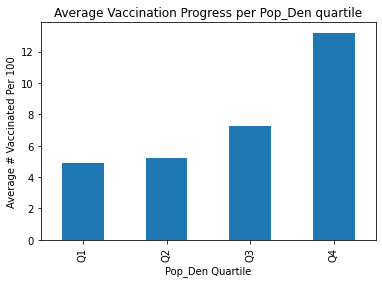

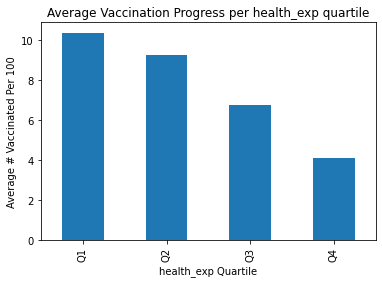

In [83]:
# Group data by bins and look at mean vaccination
for i in ['GDP','Total_Pop','Pop_Den','health_exp']:
    #Cut data into quartiles based on indicators
    iso_cleaned_df[f'{i}_Bins'] = pd.qcut(iso_cleaned_df[i],4,labels=['Q1','Q2','Q3','Q4'])
    
    #Group by quartiles
    GroupObject = iso_cleaned_df.groupby(f'{i}_Bins')['people_fully_vaccinated_per_hundred']
    
    #Plot the average of the indicator grouped into quartiles
    GroupObject.mean().plot(kind='bar')
    plt.title(f'Average Vaccination Progress per {i} quartile')
    plt.xlabel(f'{i} Quartile')
    plt.ylabel(f'Average # Vaccinated Per 100')
    plt.savefig(f'./Resources/Output/{i}.vaccMean.png')
    plt.show()
    
    

In [87]:
iso_cleaned_df

,iso_code,Country,GDP,Total_Pop,Pop_Den,health_exp,Lat_avg,Lng_avg,total_vaccinations,people_fully_vaccinated_per_hundred,GDP_Bins,Total_Pop_Bins,Pop_Den_Bins,health_exp_Bins
0,ALB,Albania,1.514702e+10,2866376.0,104.612263,44.657787,41.0000,20.0000,400064.0,0.02,Q1,Q1,Q3,Q3
1,AND,Andorra,3.218316e+09,77006.0,163.842553,32.065220,42.5000,1.6000,26414.0,6.06,Q1,Q1,Q3,Q2
2,ARE,United Arab Emirates,4.222150e+11,9630959.0,135.609110,48.421539,24.0000,54.0000,10336214.0,38.79,Q3,Q2,Q3,Q3
3,ARG,Argentina,5.176267e+11,44494502.0,16.258510,38.290127,-34.0000,-64.0000,7386650.0,1.95,Q4,Q4,Q1,Q3
4,AUT,Austria,4.550949e+11,8840521.0,107.131859,26.914829,47.3333,13.3333,2863389.0,8.73,Q4,Q2,Q3,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TUR,Turkey,7.783819e+11,82319724.0,106.960129,22.617729,39.0000,35.0000,21678461.0,9.84,Q4,Q4,Q3,Q1
96,URY,Uruguay,5.959689e+10,3449299.0,19.708028,27.016809,-33.0000,-56.0000,1695351.0,15.95,Q2,Q1,Q1,Q2
97,USA,United States,2.058016e+13,326687501.0,35.713622,49.587131,38.0000,-97.0000,232407669.0,28.93,Q4,Q4,Q2,Q4
98,ZAF,South Africa,3.682889e+11,57792520.0,47.640752,44.066910,-29.0000,24.0000,292623.0,0.49,Q3,Q4,Q2,Q3


### Linear Regression for total vaccination percentage

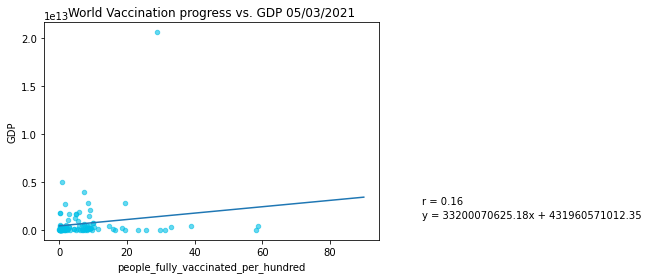

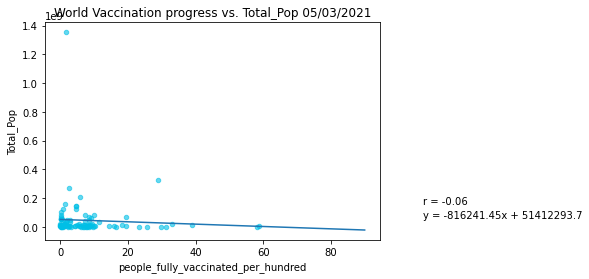

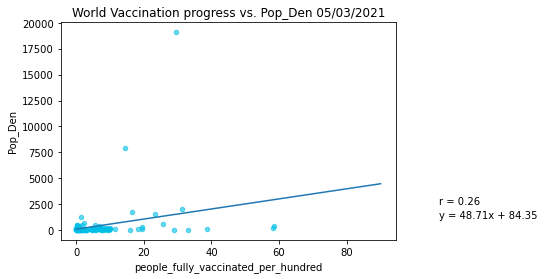

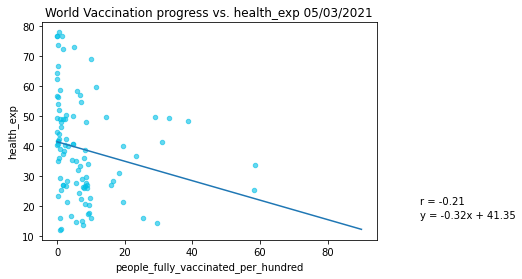

In [91]:
# Linear Regression for each data series compared to Vaccinations per 100 people
y_values = ['GDP','Total_Pop','Pop_Den','health_exp']
for metric in y_values:
    #
    x1 = iso_cleaned_df['people_fully_vaccinated_per_hundred']
    y1 = iso_cleaned_df[metric]
    analysisDate = '05/03/2021'
    
    #lin reg line
    slope, intercept, rvalue, pvalue, stderr = linregress(x1,y1)
    z = range(0,100,10)
    w = slope * z + intercept
    
    #Scatter plot and lin reg line
    fig, ax = plt.subplots()
    scatter = ax.scatter(x1, y1, s=20,color=(0,.75,.9),alpha=.6)
    
    plt.plot(z,w)
    plt.text(1,.25,f'r = {round(rvalue,2)}', transform=plt.gcf().transFigure)
    plt.text(1,.20,f'y = {round(slope,2)}x + {round(intercept,2)}', transform=plt.gcf().transFigure)
    
    #Formatting
    plt.title('World Vaccination progress vs. '+y1.name + ' '+ analysisDate)
    plt.xlabel(x1.name)
    plt.ylabel(y1.name)
    
    #Save figure and display
    plt.savefig(f'./Resources/Output/{x1.name}.{y1.name}Line.png')
    plt.show()

### Best and Worst performing countries in vaccine deployment in data set

In [92]:
x = iso_cleaned_df[['Country','people_fully_vaccinated_per_hundred']]
y = iso_cleaned_df[['Country','total_vaccinations']]

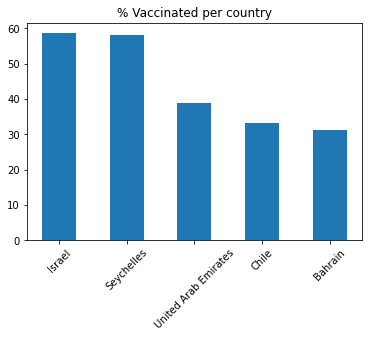

In [93]:
topVacc = x.sort_values(by='people_fully_vaccinated_per_hundred',ascending=False).head(5)
plt.bar(topVacc['Country'],topVacc['people_fully_vaccinated_per_hundred'],width=.5)
plt.title('% Vaccinated per country')
plt.xticks(rotation = 45)
plt.savefig('./Resources/Output/bestandworst/fig1.png')
plt.show()

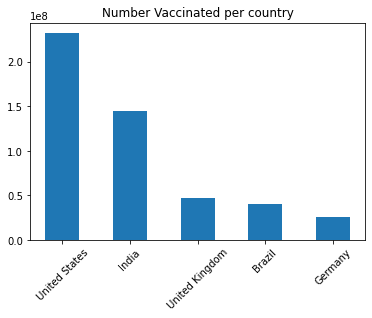

In [94]:
topTotal = y.sort_values(by='total_vaccinations',ascending=False).head(5)
plt.bar(topTotal['Country'],topTotal['total_vaccinations'],width=.5)
plt.title('Number Vaccinated per country')
plt.xticks(rotation = 45)
plt.savefig('./Resources/Output/bestandworst/fig2.png')
plt.show()

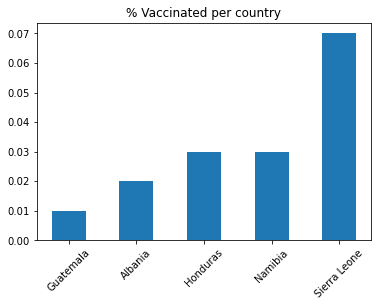

In [95]:
topVacc = x.sort_values(by='people_fully_vaccinated_per_hundred').head(5)
plt.bar(topVacc['Country'],topVacc['people_fully_vaccinated_per_hundred'],width=.5)
plt.title('% Vaccinated per country')
plt.xticks(rotation = 45)
plt.savefig('./Resources/Output/bestandworst/fig3.png')
plt.show()

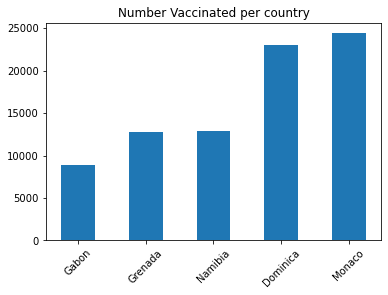

In [96]:
topTotal = y.sort_values(by='total_vaccinations').head(5)
plt.bar(topTotal['Country'],topTotal['total_vaccinations'],width=.5)
plt.title('Number Vaccinated per country')
plt.xticks(rotation = 45)
plt.savefig('./Resources/Output/bestandworst/fig4.png')
plt.show()